In [1]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import LayerNormalization
from keras.layers import Dropout
from keras.models import load_model
import tensorflow as tf
from keras.optimizers import Adam
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = np.load('/content/drive/MyDrive/Capstone Project EDA/X_data.npy', allow_pickle = True)
y = np.load('/content/drive/MyDrive/Capstone Project EDA/Y_data.npy', allow_pickle = True)

In [ ]:
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:04.0, compute capability: 7.0



In [ ]:
r = np.random.permutation(len(X))
X = X[r]
y = y[r]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
weight_for_0 = (1 / (len(y_train)-sum(y_train))) * (len(y_train) / 2.0)
weight_for_1 = (1 / sum(y_train)) * (len(y_train) / 2.0)
class_weight = {0:weight_for_0,1:weight_for_1}

In [ ]:
#Model

model = Sequential()

model.add(LayerNormalization(axis=-1 , center=True , scale=True))
model.add(Bidirectional(LSTM(100, return_sequences=True,stateful=False)))

model.add(Dropout(.2))
model.add(LayerNormalization(axis=-1 , center=True , scale=True))
model.add(Bidirectional(LSTM(50, return_sequences=True,stateful=False)))
model.add(Dropout(.2))

model.add(LayerNormalization(axis=-1, center=True , scale=True))
model.add(Bidirectional(LSTM(25, return_sequences=False,stateful=False)))
model.add(Dropout(.2))

model.add(LayerNormalization(axis=-1, center=True , scale=True))


model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy','AUC'])
# train LSTM
history = model.fit(X_train, y_train, epochs=300, batch_size=256, verbose=2,validation_split=.1, class_weight=class_weight)
# evaluate LSTM
yhat = model.predict(X_test, verbose=2)
model.evaluate(X_test,y_test)


Epoch 1/300
276/276 - 60s - loss: 0.5532 - accuracy: 0.7070 - auc: 0.7816 - val_loss: 0.5686 - val_accuracy: 0.7110 - val_auc: 0.8083
Epoch 2/300
276/276 - 47s - loss: 0.5168 - accuracy: 0.7177 - auc: 0.8047 - val_loss: 0.5208 - val_accuracy: 0.7293 - val_auc: 0.8028
Epoch 3/300
276/276 - 46s - loss: 0.5178 - accuracy: 0.7160 - auc: 0.8037 - val_loss: 0.4932 - val_accuracy: 0.7334 - val_auc: 0.8183
Epoch 4/300
276/276 - 47s - loss: 0.5101 - accuracy: 0.7168 - auc: 0.8083 - val_loss: 0.5398 - val_accuracy: 0.7207 - val_auc: 0.8086
Epoch 5/300
276/276 - 46s - loss: 0.5058 - accuracy: 0.7209 - auc: 0.8099 - val_loss: 0.5165 - val_accuracy: 0.7329 - val_auc: 0.8267
Epoch 6/300
276/276 - 46s - loss: 0.4968 - accuracy: 0.7272 - auc: 0.8195 - val_loss: 0.5211 - val_accuracy: 0.7288 - val_auc: 0.8267
Epoch 7/300
276/276 - 47s - loss: 0.5009 - accuracy: 0.7197 - auc: 0.8189 - val_loss: 0.5708 - val_accuracy: 0.6892 - val_auc: 0.8028
Epoch 8/300
276/276 - 46s - loss: 0.4984 - accuracy: 0.7270 - 

[0.1669636368751526, 0.9575294852256775, 0.9825380444526672]

In [ ]:
model.save('/content/drive/MyDrive/Capstone Project EDA/Model Saves/model_100_50_25')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project EDA/Model Saves/model_100_50_25/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Capstone Project EDA/Model Saves/model_100_50_25/assets


In [4]:
model = load_model('/content/drive/MyDrive/Capstone Project EDA/Model Saves/model_100_50_25')


In [ ]:
#Model

model = load_model('/content/drive/MyDrive/Capstone Project EDA/Model Saves/model_100_50_25')
# train LSTM
model.fit(X_train, y_train, epochs=150, batch_size=256, verbose=2, class_weight=class_weight)
# evaluate LSTM
yhat = model.predict(X_test, verbose=2)
model.evaluate(X_test,y_test)


Epoch 1/150


KeyboardInterrupt: ignored

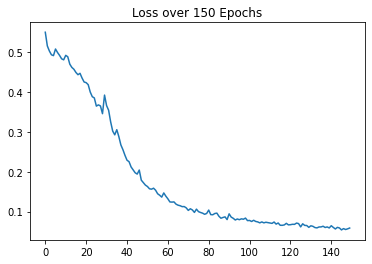

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss over 150 Epochs')
plt.show()

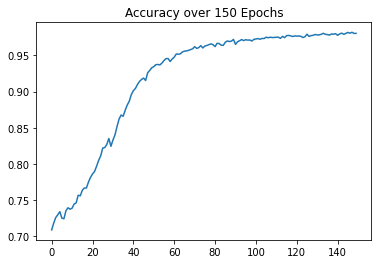

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy over 150 Epochs')
plt.show()

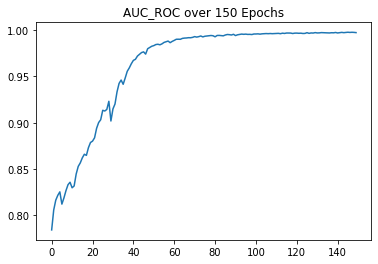

In [ ]:
plt.plot(history.history['auc'])
plt.title('AUC_ROC over 150 Epochs')
plt.show()

In [ ]:
yhat.shape

(38615,)

In [ ]:
np.argmax(yhat,axis=1)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sum(yhat)

array([11403.37], dtype=float32)